In [1]:
import pandas as pd


In [2]:
inCL = pd.read_csv('/Users/lschaefer/Documents/Insight/dataChallenges/week6/craigslistVehicles.csv')
inCF = pd.read_csv('/Users/lschaefer/Documents/Insight/dataChallenges/week6/craigslistVehiclesFull.csv')

# EDA

In [3]:
inCL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443405 entries, 0 to 443404
Data columns (total 22 columns):
url             443405 non-null object
city            443405 non-null object
city_url        443405 non-null object
price           443405 non-null int64
year            442625 non-null float64
manufacturer    416632 non-null object
make            431719 non-null object
condition       247168 non-null object
cylinders       265822 non-null object
fuel            439771 non-null object
odometer        350614 non-null float64
title_status    441334 non-null object
transmission    440070 non-null object
VIN             240560 non-null object
drive           309654 non-null object
size            152501 non-null object
type            311390 non-null object
paint_color     297871 non-null object
image_url       443393 non-null object
desc            443391 non-null object
lat             442580 non-null float64
long            442580 non-null float64
dtypes: float64(4), int64(1)

In [4]:
inCL.head()

,url,city,city_url,price,year,manufacturer,make,condition,cylinders,fuel,...,transmission,VIN,drive,size,type,paint_color,image_url,desc,lat,long
0,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,1500,2005.0,hyundai,elantra,good,4 cylinders,gas,...,automatic,NaN,fwd,mid-size,sedan,blue,https://images.craigslist.org/00C0C_jxcguIkSFN...,Selling a 2005 Hyundai Elantra 2.0 4 cylinder....,35.156142,-106.656501
1,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,10000,2010.0,bmw,535xi,good,6 cylinders,gas,...,automatic,NaN,NaN,NaN,sedan,white,https://images.craigslist.org/00t0t_cy5QmA1gOF...,"2010 BMW 535xi\nAll wheel drive \n120,000\nCle...",35.151887,-106.708317
2,https://albuquerque.craigslist.org/ctd/d/albuq...,albuquerque,https://albuquerque.craigslist.org,2000,2005.0,toyota,tacoma,NaN,NaN,gas,...,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00E0E_izNM6a51mb...,Contact at amandafiorello(at)hotmail.com\n\n \...,35.058537,-106.877873
3,https://albuquerque.craigslist.org/cto/d/rio-r...,albuquerque,https://albuquerque.craigslist.org,2300,1971.0,ford,NaN,fair,8 cylinders,gas,...,automatic,NaN,rwd,NaN,NaN,NaN,https://images.craigslist.org/01414_gX7P5ovXx0...,CLASSIC FORD NEEDS A HOME. SERIOUS BUYERS ONLY...,35.249300,-106.681800
4,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,2000,1998.0,toyota,camry,good,6 cylinders,gas,...,automatic,NaN,NaN,compact,NaN,NaN,https://images.craigslist.org/00L0L_oXTsooKih6...,Good running car. Great on gas. It has a sunro...,35.058537,-106.877873


In [5]:
inCL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443405 entries, 0 to 443404
Data columns (total 22 columns):
url             443405 non-null object
city            443405 non-null object
city_url        443405 non-null object
price           443405 non-null int64
year            442625 non-null float64
manufacturer    416632 non-null object
make            431719 non-null object
condition       247168 non-null object
cylinders       265822 non-null object
fuel            439771 non-null object
odometer        350614 non-null float64
title_status    441334 non-null object
transmission    440070 non-null object
VIN             240560 non-null object
drive           309654 non-null object
size            152501 non-null object
type            311390 non-null object
paint_color     297871 non-null object
image_url       443393 non-null object
desc            443391 non-null object
lat             442580 non-null float64
long            442580 non-null float64
dtypes: float64(4), int64(1)

In [6]:
import folium 
from IPython.display import IFrame

def embed_map(m, file_name):
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

inCLNoMapNaNs = inCL.dropna(subset=['lat','long'])
heatmap = folium.Map(tiles='cartodbpositron') 
from folium.plugins import HeatMap
HeatMap(data=inCLNoMapNaNs[['lat', 'long']], radius=8).add_to(heatmap)
embed_map(heatmap, "heatmap.html")



Some (lat,long) are nonsensical, and some are missing ...
But it looks like we have city information for each data point.
That is certainly granular enough.

In [7]:
inCL.drop(columns=['lat','long'],inplace=True)

In [8]:
cities = inCL['city'].unique()

In [9]:
cities

array(['albuquerque', 'altoona-johnstown', 'amarillo, TX', 'ames, IA',
       'anchorage / mat-su', 'annapolis, MD', 'ann arbor, MI',
       'appleton-oshkosh-FDL', 'asheville, NC', 'ashtabula, OH',
       'athens, GA', 'athens, OH', 'atlanta, GA', 'auburn, AL',
       'augusta, GA', 'austin, TX', 'bakersfield, CA', 'baltimore, MD',
       'baton rouge', 'battle creek, MI', 'beaumont / port arthur',
       'bellingham, WA', 'bemidji, MN', 'bend, OR', 'billings, MT',
       'binghamton, NY', 'birmingham, AL', 'bismarck, ND',
       'bloomington, IN', 'bloomington-normal', 'boise, ID', 'boone, NC',
       'boston', 'boulder, CO', 'bowling green, KY', 'bozeman, MT',
       'brainerd, MN', 'brownsville, TX', 'brunswick, GA', 'buffalo, NY',
       'butte, MT', 'cape cod / islands', 'catskills', 'cedar rapids, IA',
       'central louisiana', 'central michigan', 'central NJ',
       'champaign urbana', 'charleston, SC', 'charleston, WV',
       'charlotte, NC', 'charlottesville, VA', 'chatta

In [10]:
# start looking at other csv
inCF.head()

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,paint_color,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,https://marshall.craigslist.org/cto/d/2010-dod...,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,...,red,https://images.craigslist.org/00i0i_2ggH1eKDNK...,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,https://marshall.craigslist.org/cto/d/fleetwoo...,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00M0M_irjh7SjEcU...,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,https://marshall.craigslist.org/cto/d/2008-for...,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00s0s_eL2XFhEUcx...,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,https://marshall.craigslist.org/cto/d/ford-tau...,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,...,grey,https://images.craigslist.org/00L0L_5HUR1nQjt8...,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,https://marshall.craigslist.org/cto/d/2001-gra...,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,...,NaN,https://images.craigslist.org/00n0n_bJJ1XnonSG...,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


In [11]:
inCF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723065 entries, 0 to 1723064
Data columns (total 26 columns):
url             object
city            object
price           int64
year            float64
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
title_status    object
transmission    object
vin             object
drive           object
size            object
type            object
paint_color     object
image_url       object
lat             float64
long            float64
county_fips     float64
county_name     object
state_fips      float64
state_code      object
state_name      object
weather         float64
dtypes: float64(7), int64(1), object(18)
memory usage: 341.8+ MB


In [12]:
print(inCF['city'].unique())

['marshall' 'soo' 'whistler' 'easttexas' 'skeena' 'lasvegas' 'hartford'
 'reading' 'chambersburg' 'meadville' 'rapidcity' 'roseburg'
 'orangecounty' 'rockford' 'hat' 'salina' 'lascruces' 'nd' 'allentown'
 'csd' 'mattoon' 'humboldt' 'goldcountry' 'dothan' 'pittsburgh' 'lakecity'
 'maine' 'charlotte' 'lewiston' 'cnj' 'wilmington' 'syracuse' 'columbia'
 'tucson' 'asheville' 'providence' 'mcallen' 'butte' 'lakecharles'
 'showlow' 'frederick' 'thumb' 'ogden' 'lethbridge' 'youngstown' 'erie'
 'anchorage' 'yellowknife' 'appleton' 'springfieldil' 'glensfalls'
 'norfolk' 'nh' 'sheboygan' 'yuma' 'cookeville' 'kenai' 'loz'
 'plattsburgh' 'stlouis' 'brownsville' 'savannah' 'clovis' 'baltimore'
 'kingston' 'roswell' 'spokane' 'battlecreek' 'boone' 'regina' 'hanford'
 'tuscarawas' 'cosprings' 'cedarrapids' 'orlando' 'helena' 'blacksburg'
 'skagit' 'nmi' 'santafe' 'whitehorse' 'fayetteville' 'kansascity'
 'edmonton' 'pullman' 'eauclaire' 'oklahomacity' 'amarillo' 'york' 'bgky'
 'keys' 'stjoseph' 'nat

In [13]:
# merge these tables and remove duplicates
# looks like the CF city names here correspond exactly to the CL url
# use this for merging

In [14]:
print(inCL['city_url'])

0         https://albuquerque.craigslist.org
1         https://albuquerque.craigslist.org
2         https://albuquerque.craigslist.org
3         https://albuquerque.craigslist.org
4         https://albuquerque.craigslist.org
                         ...                
443400     https://zanesville.craigslist.org
443401     https://zanesville.craigslist.org
443402     https://zanesville.craigslist.org
443403     https://zanesville.craigslist.org
443404     https://zanesville.craigslist.org
Name: city_url, Length: 443405, dtype: object


In [15]:
# cut out https:// from start and .craigslist.org from end
inCL['cityStandard']=inCL['city_url'].str.slice(start=8,stop=-15)

In [16]:
inCF['cityStandard']=inCF['city']

In [17]:
inCL = inCL.append(inCF,sort=False)

In [18]:
inCL.drop_duplicates(subset=['url'],inplace=True)
inCL.reset_index(drop=True, inplace=True)

In [19]:
# this is a huge DF, remove uninteresting columns
inCL.drop(columns=['url','paint_color','image_url','VIN','vin','title_status'],inplace=True)

In [20]:
inCL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166470 entries, 0 to 2166469
Data columns (total 24 columns):
city            object
city_url        object
price           int64
year            float64
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
transmission    object
drive           object
size            object
type            object
desc            object
cityStandard    object
lat             float64
long            float64
county_fips     float64
county_name     object
state_fips      float64
state_code      object
state_name      object
weather         float64
dtypes: float64(7), int64(1), object(16)
memory usage: 396.7+ MB


In [21]:
inCL.head()

,city,city_url,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,desc,cityStandard,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,albuquerque,https://albuquerque.craigslist.org,1500,2005.0,hyundai,elantra,good,4 cylinders,gas,256000.0,...,Selling a 2005 Hyundai Elantra 2.0 4 cylinder....,albuquerque,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,albuquerque,https://albuquerque.craigslist.org,10000,2010.0,bmw,535xi,good,6 cylinders,gas,NaN,...,"2010 BMW 535xi\nAll wheel drive \n120,000\nCle...",albuquerque,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,albuquerque,https://albuquerque.craigslist.org,2000,2005.0,toyota,tacoma,NaN,NaN,gas,NaN,...,Contact at amandafiorello(at)hotmail.com\n\n \...,albuquerque,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,albuquerque,https://albuquerque.craigslist.org,2300,1971.0,ford,NaN,fair,8 cylinders,gas,NaN,...,CLASSIC FORD NEEDS A HOME. SERIOUS BUYERS ONLY...,albuquerque,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,albuquerque,https://albuquerque.craigslist.org,2000,1998.0,toyota,camry,good,6 cylinders,gas,236300.0,...,Good running car. Great on gas. It has a sunro...,albuquerque,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
print(len(inCL['cityStandard'].unique()))

471


In [23]:
print(inCL.groupby([inCL['cityStandard']]).price.count().max())
print(inCL.groupby([inCL['cityStandard']]).price.count().min())
print(inCL.groupby([inCL['cityStandard']]).price.count().mean())
print(inCL.groupby([inCL['cityStandard']]).price.count().median())


11267
1
4599.723991507431
3503.0


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

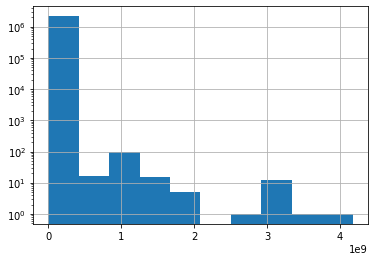

In [25]:
inCL.price.hist()
plt.yscale('log')

In [26]:
inCL = inCL.loc[inCL['price']<50000]

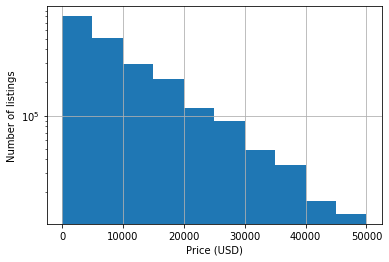

In [27]:
inCL.price.hist()
plt.ylabel('Number of listings')
plt.xlabel('Price (USD)')
plt.yscale('log')

In [28]:
print(inCL['manufacturer'].unique())

['hyundai' 'bmw' 'toyota' 'ford' 'buick' 'chevrolet' 'mazda' 'audi'
 'honda' 'pontiac' 'ram' 'dodge' 'chrysler' 'lexus' 'nissan' 'volkswagen'
 'subaru' nan 'mercedes-benz' 'jeep' 'kia' 'acura' 'saturn' 'gmc'
 'lincoln' 'mitsubishi' 'volvo' 'cadillac' 'infiniti' 'jaguar' 'mini'
 'rover' 'fiat' 'mercury' 'datsun' 'porche' 'harley-davidson' 'alfa-romeo'
 'ferrari' 'aston-martin' 'land rover' 'morgan' 'hennessey' 'chev' 'chevy'
 'mercedes' 'vw' 'infinity' 'harley' 'alfa' 'noble' 'landrover'
 'mercedesbenz' 'aston']


In [29]:
# remove the high end stuff from the list. 
# these probably aren't very similar to honda markets
inCL=inCL.loc[~inCL['manufacturer'].isin(['aston','aston-martin','ferrari','infiniti','jaguar','porche','alfa-romeo','infinity','alfa'])]

In [30]:
print(inCL['manufacturer'].unique())

['hyundai' 'bmw' 'toyota' 'ford' 'buick' 'chevrolet' 'mazda' 'audi'
 'honda' 'pontiac' 'ram' 'dodge' 'chrysler' 'lexus' 'nissan' 'volkswagen'
 'subaru' nan 'mercedes-benz' 'jeep' 'kia' 'acura' 'saturn' 'gmc'
 'lincoln' 'mitsubishi' 'volvo' 'cadillac' 'mini' 'rover' 'fiat' 'mercury'
 'datsun' 'harley-davidson' 'land rover' 'morgan' 'hennessey' 'chev'
 'chevy' 'mercedes' 'vw' 'harley' 'noble' 'landrover' 'mercedesbenz']


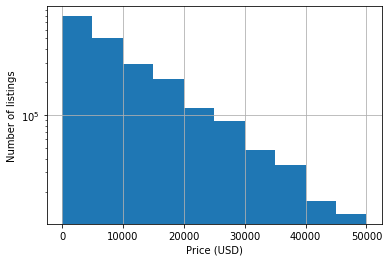

In [31]:
inCL.price.hist()
plt.ylabel('Number of listings')
plt.xlabel('Price (USD)')
plt.yscale('log')

In [32]:
inCL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121240 entries, 0 to 2166469
Data columns (total 24 columns):
city            object
city_url        object
price           int64
year            float64
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
transmission    object
drive           object
size            object
type            object
desc            object
cityStandard    object
lat             float64
long            float64
county_fips     float64
county_name     object
state_fips      float64
state_code      object
state_name      object
weather         float64
dtypes: float64(7), int64(1), object(16)
memory usage: 404.6+ MB


In [33]:
# which of these would I want to input into a model
# cityStandard (target), price, year, manufacturer, make, condition, odometer
# others could be useful but could duplicate info and/or only be available in one of the input tables
# so.... remove everything else

In [34]:
listings=inCL.copy()
listings=listings.filter(['cityStandard','price','year','manufacturer','make','condition','odometer'])
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121240 entries, 0 to 2166469
Data columns (total 7 columns):
cityStandard    object
price           int64
year            float64
manufacturer    object
make            object
condition       object
odometer        float64
dtypes: float64(2), int64(1), object(4)
memory usage: 129.5+ MB


In [35]:
listings.head()

,cityStandard,price,year,manufacturer,make,condition,odometer
0,albuquerque,1500,2005.0,hyundai,elantra,good,256000.0
1,albuquerque,10000,2010.0,bmw,535xi,good,NaN
2,albuquerque,2000,2005.0,toyota,tacoma,NaN,NaN
3,albuquerque,2300,1971.0,ford,NaN,fair,NaN
4,albuquerque,2000,1998.0,toyota,camry,good,236300.0


In [36]:
listings.dropna(inplace=True)
listings.reset_index(drop=True, inplace=True)

In [37]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892130 entries, 0 to 892129
Data columns (total 7 columns):
cityStandard    892130 non-null object
price           892130 non-null int64
year            892130 non-null float64
manufacturer    892130 non-null object
make            892130 non-null object
condition       892130 non-null object
odometer        892130 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47.6+ MB


In [38]:
listings.head()

,cityStandard,price,year,manufacturer,make,condition,odometer
0,albuquerque,1500,2005.0,hyundai,elantra,good,256000.0
1,albuquerque,2000,1998.0,toyota,camry,good,236300.0
2,albuquerque,15500,1965.0,ford,mustang,excellent,4800.0
3,albuquerque,9300,2014.0,buick,verano,like new,50000.0
4,albuquerque,7500,2013.0,chevrolet,malibãº,excellent,73000.0


In [39]:
# now do some sort of clustering
# see which regions are close to omaha

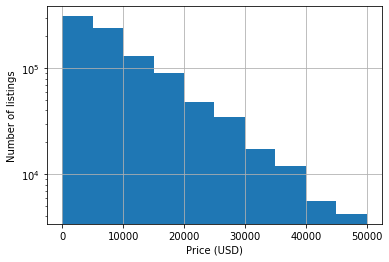

In [40]:
listings.price.hist()
plt.ylabel('Number of listings')
plt.xlabel('Price (USD)')
plt.yscale('log')

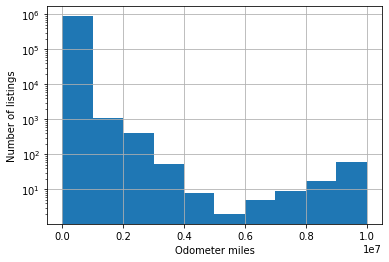

In [41]:
listings.odometer.hist()
plt.ylabel('Number of listings')
plt.xlabel('Odometer miles')
plt.yscale('log')

In [42]:
listings = listings.loc[listings['odometer']<500000]

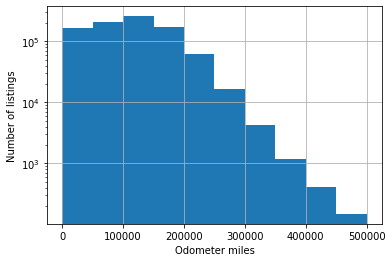

In [43]:
listings.odometer.hist()
plt.ylabel('Number of listings')
plt.xlabel('Odometer miles')
plt.yscale('log')

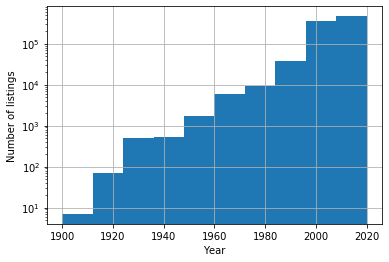

In [44]:
listings.year.hist()
plt.ylabel('Number of listings')
plt.xlabel('Year')
plt.yscale('log')

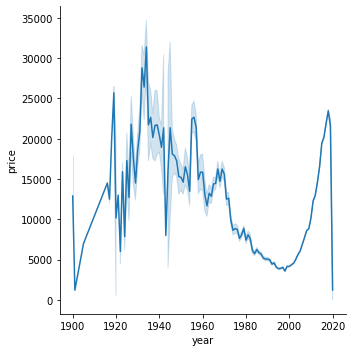

In [45]:
sns.relplot(x='year',y='price',data=listings,kind='line')

In [47]:
import numpy as np

In [62]:
from kmodes.kmodes import KModes

In [56]:
# define the k-modes model
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
# fit the clusters to the skills dataframe
clusters = km.fit_predict(listings.copy().drop(columns=['cityStandard']))
# get an array of cluster modes
kmodes = km.cluster_centroids_
shape = kmodes.shape


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 54812, cost: 4265040.0
Run 1, iteration: 2/100, moves: 1498, cost: 4265040.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 42615, cost: 4264919.0
Run 2, iteration: 2/100, moves: 0, cost: 4264919.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 57019, cost: 4233181.0
Run 3, iteration: 2/100, moves: 0, cost: 4233181.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 94464, cost: 4267041.0
Run 4, iteration: 2/100, moves: 0, cost: 4267041.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 63543, cost: 4514358.0
Run 5, iteration: 2/100, moves: 0, cost: 4514358.0
Best run was number 3


In [61]:
# For each cluster mode (a vector of "1" and "0")
# find and print the column headings where "1" appears.
# If no "1" appears, assign to "no-skills" cluster.
for i in range(shape[0]):
    print("\ncluster " + str(i) + ": ")
    cent = kmodes[i,:]
    print (cent)
    for j in listings.copy().drop(columns=['cityStandard']).columns[np.nonzero(cent)]:
        print(j)


cluster 0: 
['4000' '2003.0' 'ford' 'f-150' 'like new' '200000.0']
price
year
manufacturer
make
condition
odometer

cluster 1: 
['0' '2015.0' 'ford' 'f-150' 'excellent' '150000.0']
price
year
manufacturer
make
condition
odometer

cluster 2: 
['2500' '2007.0' 'chevrolet' '1500' 'good' '150000.0']
price
year
manufacturer
make
condition
odometer
